# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
data=pd.read_csv('webmd.csv')

In [3]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data.shape

(362806, 12)

# Insight

The intial data consist of 362806 rows and 12 columns

# Creating Columns for Race and Name

In [5]:
pip install mimesis

Note: you may need to restart the kernel to use updated packages.


In [6]:
from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

data_name.head()

,Name
0,Dexter
1,Derek
2,Torri
3,Annamaria
4,Julius


In [7]:
import random

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head()


,Race
0,White
1,Hispanic
2,Black
3,Asian
4,Hispanic


In [8]:
data1= pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
data1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Dexter,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Derek,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Torri,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Annamaria,Asian,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Julius,Hispanic,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [9]:
data=data1

# BASIC DETAILS OF DATASET

In [10]:
data.shape


(362806, 14)

Final datset consist of 362806 rows and 14 columns

# To display more information

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


# Insight

The info() method will give summary of the dataset. We can know the basic information about the dataset including the type of columns, non-null values and memory usage. This dataset contains 9 categorical variables and 5 integer variables.

# Exploring the column names

In [12]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

# Description of the Dataset

Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful



# EDA

Descriptive statistics

In [13]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


# Insight

Displays the summary statistics such as count, mean, standard deviation, minimum and maximum value, first, second and third quartile values.

In [14]:
data.corr()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
DrugId,1.000000,-0.019380,-0.011774,-0.035221,0.010641
EaseofUse,-0.019380,1.000000,0.552242,0.563748,0.028104
Effectiveness,-0.011774,0.552242,1.000000,0.793221,0.048033
Satisfaction,-0.035221,0.563748,0.793221,1.000000,0.018784
UsefulCount,0.010641,0.028104,0.048033,0.018784,1.000000


In [15]:
data.Drug.nunique()

7093

INSIGHT: In total there are 7093 different drugs in the dataset

In [16]:
data.Drug.mode()

0    cymbalta
Name: Drug, dtype: object

# Insight

Drug cymbalta has the most occurance

In [17]:
#unique number of side effects.
data.Sides.nunique()

1651

# counts of unique values

In [18]:
data['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [19]:
data['Reviews'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           41824
good                                                                                                                                                                                                                                                                                                                                                   

In [20]:
data['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [21]:
data['Condition'].value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [22]:
data["Sex"].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [23]:
data['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [24]:
data['UsefulCount'].unique()

array([  0,   1,   3,  10,   5,   4,   2,   7,   6,  12,  15,   9,  14,
        13,  18,  29,  17,   8,  30,  20,  16,  25,  19,  11,  23,  38,
        44,  34,  35,  21,  42,  28,  36,  40,  60,  48,  61,  50,  43,
        26,  22,  41,  54,  24,  33,  27,  45,  59,  75,  77,  66,  31,
        47,  32,  90,  84,  39,  55, 137,  53,  56,  65,  46,  37,  74,
        49,  63,  57,  71,  51,  67, 105,  58,  62,  52,  70, 113,  83,
       140,  88, 100, 107,  79,  96,  72,  97,  64,  87,  76,  68, 131,
       101,  69, 108, 154,  81, 109, 112,  82, 136,  80, 117, 103,  86,
        73,  92, 133,  85, 119, 141, 123,  78,  89,  91, 135, 110, 169,
       176, 178, 126,  94, 127,  99, 104, 255,  98, 106, 134, 121, 111,
       102, 114, 120, 156, 222, 129, 166, 142, 125, 115,  93, 132, 122,
       128, 188, 145, 116,  95], dtype=int64)

# Missing values

In [25]:
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

There are 37 missing rows in the review column

# VISUALIZATION

# Which age group and gender consume drugs the most

<module 'matplotlib.pyplot' from 'C:\\Users\\Anagha\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

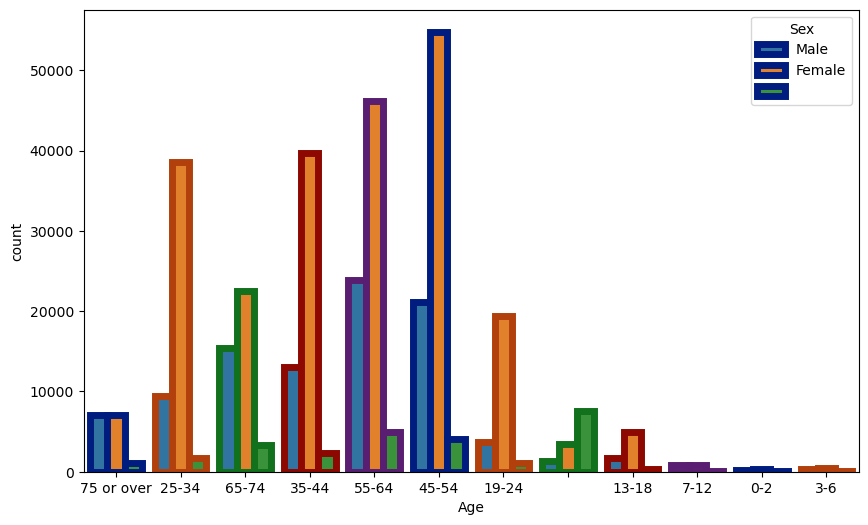

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Age",hue = "Sex" ,edgecolor=sns.color_palette("dark", 5),data=data,
                   linewidth=5,)
plt


# Percentage of Effectiveness

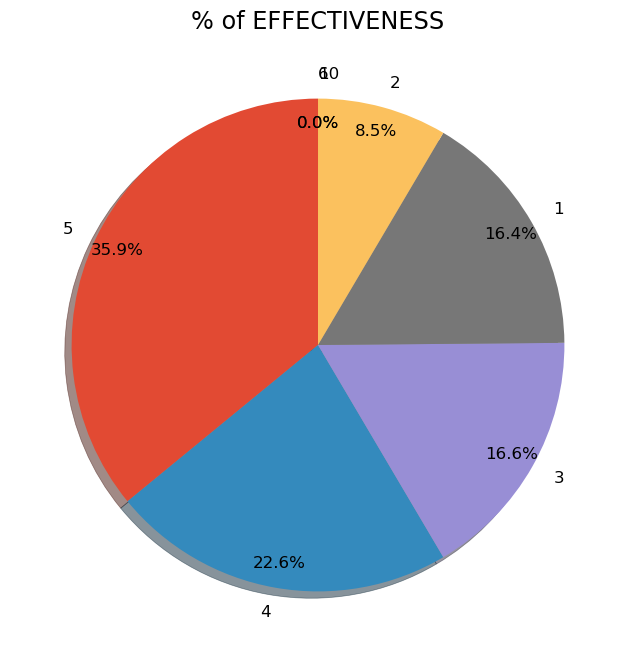

In [28]:
plt.figure(figsize=(10,8))
plt.title('% of EFFECTIVENESS')
tr = pd.DataFrame(data['Effectiveness'].value_counts())
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)

plt.show()

# Top 20 Drugs based on No. of Users

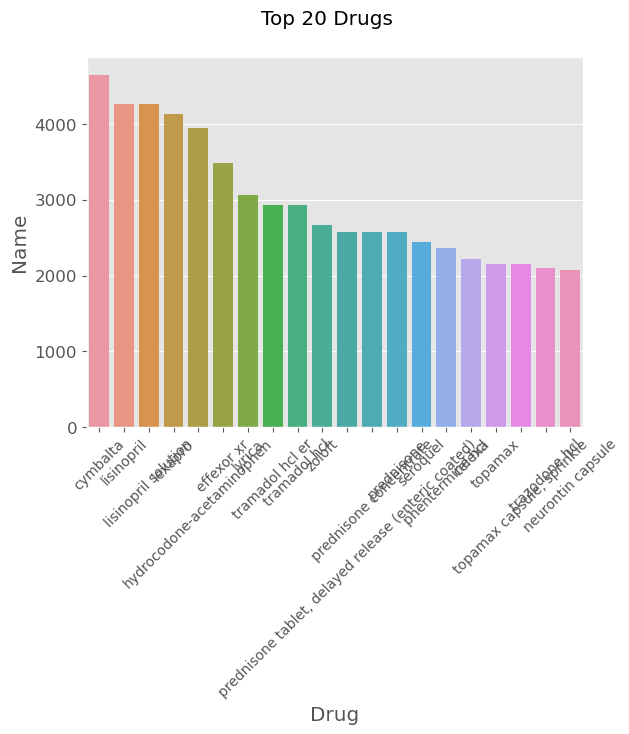

In [29]:
data_= data['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=45,fontsize=10)
plt.show()

# Top 15 condittions

Text(0, 0.5, 'Users')

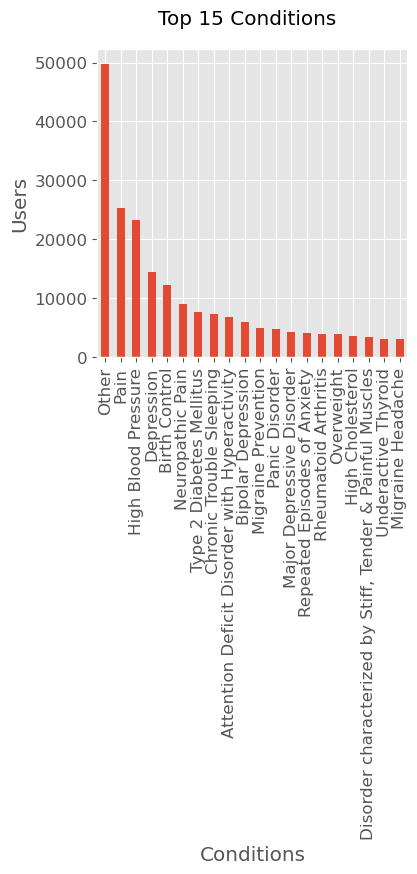

In [30]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(4,4))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

# Selection of Drug:We are selecting the dataset of drug named 'cymbalta' with DrugId =91491 .Because it is having the most occurences.

# BASIC DETAILS OF DATASET

In [31]:
data2 = data[data.DrugId == 91491]

In [32]:
data2.shape

(4648, 14)

In [33]:
data2.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
314212,Soo,Hispanic,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,,"Nausea , dry mouth , constipation , loss of ...",12
314216,Cris,Hispanic,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,Carol,Black,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,,"Nausea , dry mouth , constipation , loss of ...",0
314235,Keenan,Asian,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,Harry,Black,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,,"Nausea , dry mouth , constipation , loss of ...",1


In [34]:
data2.Sides.nunique()

1

# EDA ON cymbalta

In [35]:
data2['Satisfaction'].value_counts()

1    1490
5    1268
4     852
3     646
2     392
Name: Satisfaction, dtype: int64

In [36]:
data2['UsefulCount'].unique()

array([ 12,   0,   1,   2,  11,  22,   3,  15,  27,  30,   4,   5,  19,
        28,  21,  36,  35,  34,  25,   8,   7,  18,  39,   9,  56,  29,
        71,  23,   6,  32,  24,  17,  13,  14,  10,  16,  20,  42, 103,
        38,  33,  26,  61,  41,  93,  90, 134, 145,  51,  43,  48,  31,
        82,  58,  46,  47,  45,  44,  60,  50, 116,  40,  65,  97,  77,
       129,  68,  59,  37], dtype=int64)

In [37]:
data2['EaseofUse'].value_counts()

5    2502
4     998
3     484
1     476
2     188
Name: EaseofUse, dtype: int64

In [38]:
data2['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4648
Name: Sides, dtype: int64

In [39]:
data2['Sides'].unique()

array(['Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.'],
      dtype=object)

# Finding missing values

In [40]:
data2['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
               118
75 or over     102
13-18           34
0-2              1
7-12             1
Name: Age, dtype: int64

# Insight : 

no age group specified for 118 rows

# Replacing it by 3-6 age group

In [41]:
data2['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [42]:
data2['Age'].value_counts()


45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
3-6            118
75 or over     102
13-18           34
0-2              1
7-12             1
Name: Age, dtype: int64

In [43]:
data2['Sex'].value_counts()

Female    3621
Male       830
           197
Name: Sex, dtype: int64

# Insight

197 rows without gender specification

# Replacing it by 'others' 

In [44]:
data2['Sex'].replace(to_replace = [' '], value = 'others', inplace = True)

In [45]:
data2['Sex'].value_counts()

Female    3621
Male       830
others     197
Name: Sex, dtype: int64

In [46]:
data_cpy=data2

Satisfaction column

In [47]:
data2['Satisfaction'].value_counts()

1    1490
5    1268
4     852
3     646
2     392
Name: Satisfaction, dtype: int64

In [48]:
data2['Effectiveness'].value_counts()

5    1369
4    1102
1     953
3     810
2     414
Name: Effectiveness, dtype: int64

# Recode the values of Satisfaction to a categorical values.
#Creation of a new SideEffects column

In [49]:
data2['Satisfaction'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)
data2['Satisfaction'].replace(to_replace = [2], value =['severe side effects'], inplace = True)
data2['Satisfaction'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)
data2['Satisfaction'].replace(to_replace = [4], value =['mild side effects'], inplace = True)
data2['Satisfaction'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [50]:
data2.rename(columns={'Satisfaction': 'SideEffects'}, inplace=True)

In [51]:
data2.drop('DrugId', inplace=True, axis=1)

Since DrugId is the same, dropping the column

In [52]:
data2.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,SideEffects,Sex,Sides,UsefulCount
314212,Soo,Hispanic,3-6,Major Depressive Disorder,2/29/2020,cymbalta,5,5,No Script or health Insurance needed to place ...,no side effects,others,"Nausea , dry mouth , constipation , loss of ...",12
314216,Cris,Hispanic,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,3,1,I was prescribed Cymbalta for anxiety and star...,extreme severe side effects,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,Carol,Black,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,5,5,Switched from Effexor to this medicine after 1...,no side effects,others,"Nausea , dry mouth , constipation , loss of ...",0
314235,Keenan,Asian,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,severe side effects,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,Harry,Black,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,2,2,"I have depression, anxiety, Fibro, severe musc...",severe side effects,others,"Nausea , dry mouth , constipation , loss of ...",1


<AxesSubplot:>

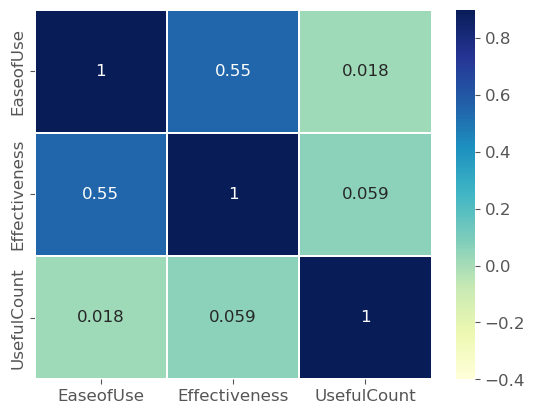

In [53]:
#CHECKING CORRELATION
corrmatrix = data2.corr()

sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

# VISUALIZATION

# Percentage of Effectiveness

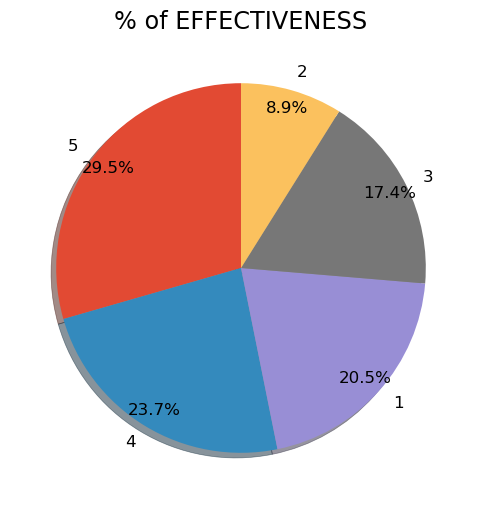

In [54]:
plt.figure(figsize=(10,6))
plt.title('% of EFFECTIVENESS')
tr = pd.DataFrame(data2['Effectiveness'].value_counts())
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)

plt.show()

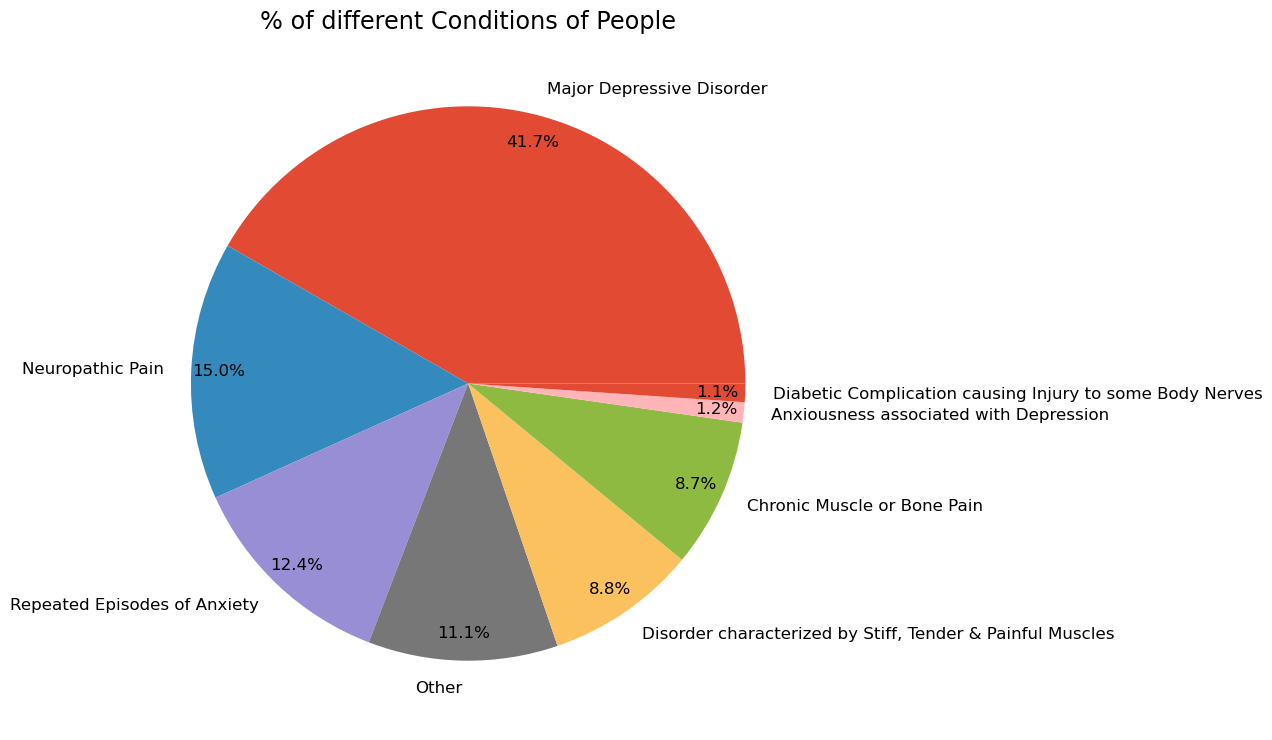

In [55]:
plt.figure(figsize=(15,9))
plt.title('% of different Conditions of People')
tr = pd.DataFrame(data2['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)

plt.show()

# Users by Age and Gender

<module 'matplotlib.pyplot' from 'C:\\Users\\Anagha\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

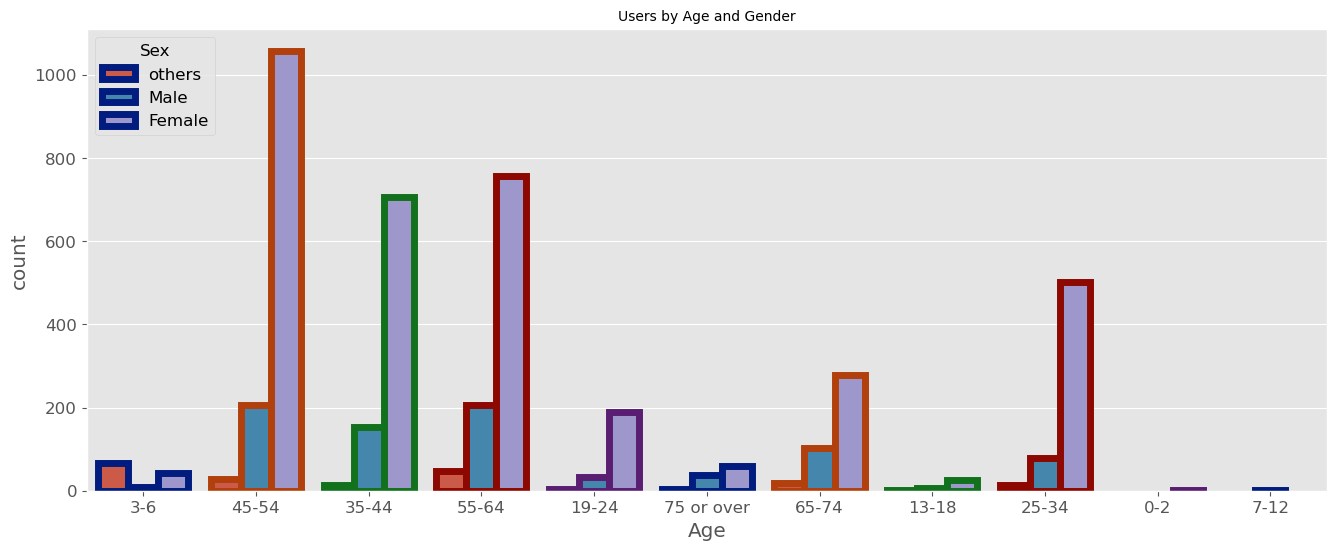

In [56]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Age",hue = "Sex" ,edgecolor=sns.color_palette("dark", 5),data=data2,
                   linewidth=5,)
plt.title("Users by Age and Gender", fontsize = 10)
plt


# Percentage of patients having side effects in age group 45-54

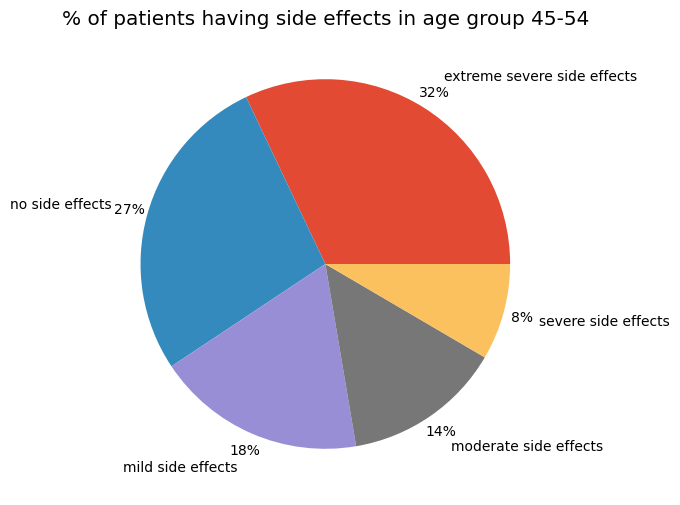

In [57]:
tr = pd.DataFrame(data2['SideEffects'].value_counts())
tr_names = tr.index
count=tr['SideEffects']

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of patients having side effects in age group 45-54')
plt.show()


# which race has reported extreme side effects?

<AxesSubplot:xlabel='Race', ylabel='count'>

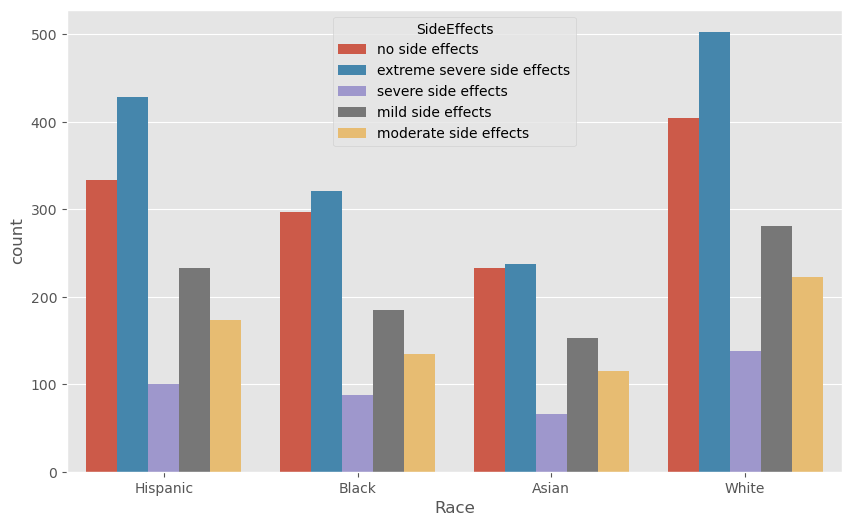

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data2)

# Among the gender category, how is the sideeffects of the drug?

<Figure size 1000x1000 with 0 Axes>

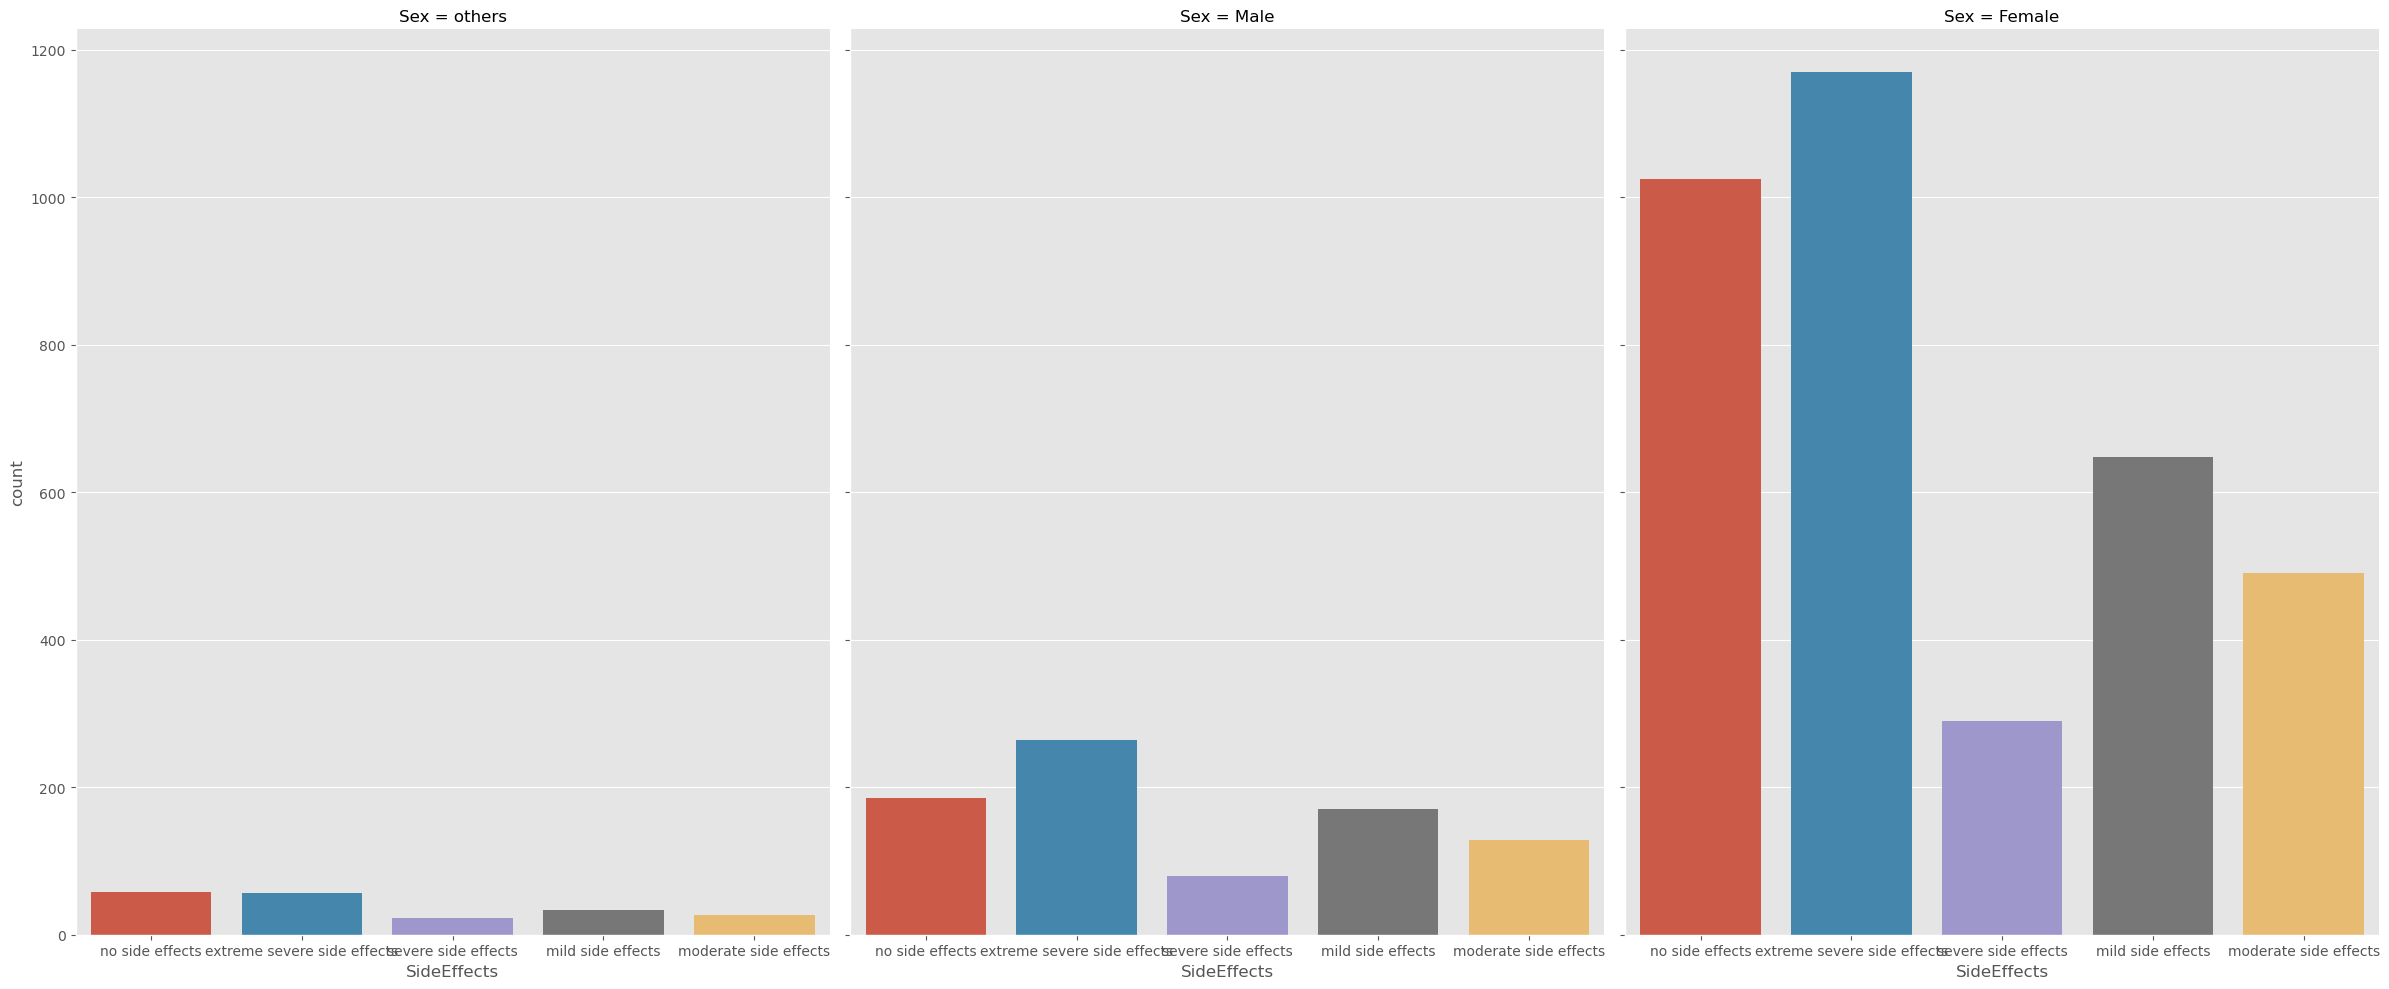

In [59]:
plt.figure(figsize=(10,10))

g = sns.catplot(x="SideEffects",col="Sex",data=data2, kind="count",height=10,aspect =0.8);

# Which race is the predominant user?

Text(0, 0.5, 'Count')

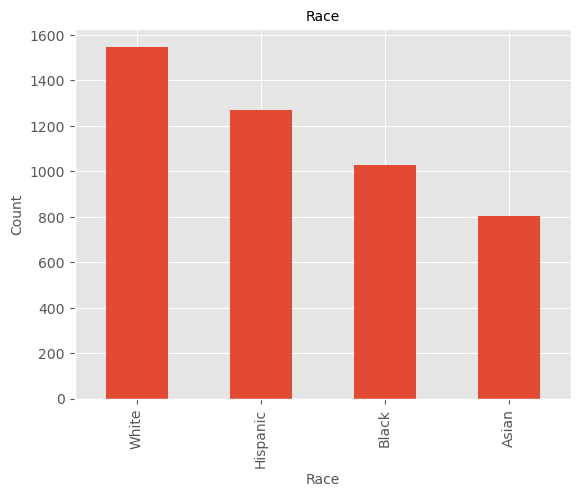

In [60]:
data2['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# In each race, which gender is the predominant user?

Text(0.5, 1.0, 'Users by Race and Gender')

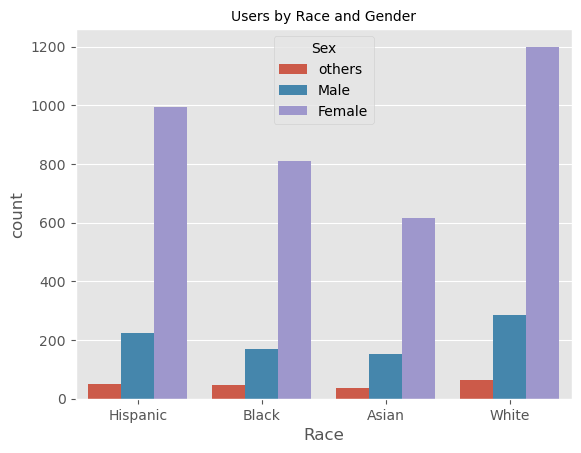

In [61]:
sns.countplot(x='Race',hue='Sex',data=data2)
plt.title("Users by Race and Gender", fontsize = 10)

# In each age group, which gender is the predominant user?

Text(0.5, 1.0, 'Users by Age and Gender')

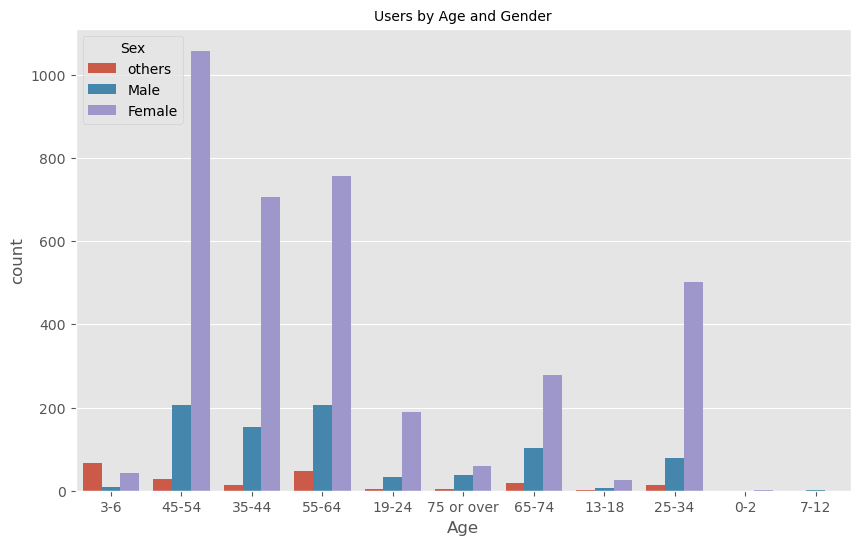

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data2)
plt.title("Users by Age and Gender", fontsize = 10)

# Data Pre-processing

# 1. Handling whitespaces

In [63]:
# Handling instances with whitespaces
for i in data2:
    data2[i]=np.where(data2[i]==" ",np.NAN,data2[i])

In [64]:
data2.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,SideEffects,Sex,Sides,UsefulCount
314212,Soo,Hispanic,3-6,Major Depressive Disorder,2/29/2020,cymbalta,5.0,5.0,No Script or health Insurance needed to place ...,no side effects,others,"Nausea , dry mouth , constipation , loss of ...",12.0
314216,Cris,Hispanic,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,3.0,1.0,I was prescribed Cymbalta for anxiety and star...,extreme severe side effects,Male,"Nausea , dry mouth , constipation , loss of ...",0.0
314223,Carol,Black,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,5.0,5.0,Switched from Effexor to this medicine after 1...,no side effects,others,"Nausea , dry mouth , constipation , loss of ...",0.0
314235,Keenan,Asian,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,3.0,3.0,Bipolar I with a neck fusion. Pdoc prescribed ...,severe side effects,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
314246,Harry,Black,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,2.0,2.0,"I have depression, anxiety, Fibro, severe musc...",severe side effects,others,"Nausea , dry mouth , constipation , loss of ...",1.0


# 2. Missing values

In [65]:
#checking missing values
data2.isnull().sum()

Name               0
Race               0
Age                0
Condition          0
Date               0
Drug               0
EaseofUse          0
Effectiveness      0
Reviews          502
SideEffects        0
Sex                0
Sides              0
UsefulCount        0
dtype: int64

# Insight

502 rows of null values in review column 

# Removing rows with null data

In [66]:
# Removing rows with null data
data2=data2.dropna(axis=0)

In [67]:
data2.shape

(4146, 13)

# Insight

Final datset for moddeling (cymbalta)  have 4146 rows and 13 rows

# 3.Gender

In [68]:
data2['Sex'].value_counts()

Female    3284
Male       711
others     151
Name: Sex, dtype: int64

# 4.Handling age group

In [69]:
data2['Age'].value_counts()

45-54         1149
55-64          895
35-44          795
25-34          549
65-74          346
19-24          211
3-6             87
75 or over      82
13-18           30
0-2              1
7-12             1
Name: Age, dtype: int64

#  Replacing 75 or over to 7-100

In [70]:
data2['Age']=data2['Age'].str.replace('75 or over','75-100')

In [71]:
data2['Age'].value_counts()

45-54     1149
55-64      895
35-44      795
25-34      549
65-74      346
19-24      211
3-6         87
75-100      82
13-18       30
0-2          1
7-12         1
Name: Age, dtype: int64

In [72]:
data_cpy=data2.copy()

# 5. Outlier Detection and Removal

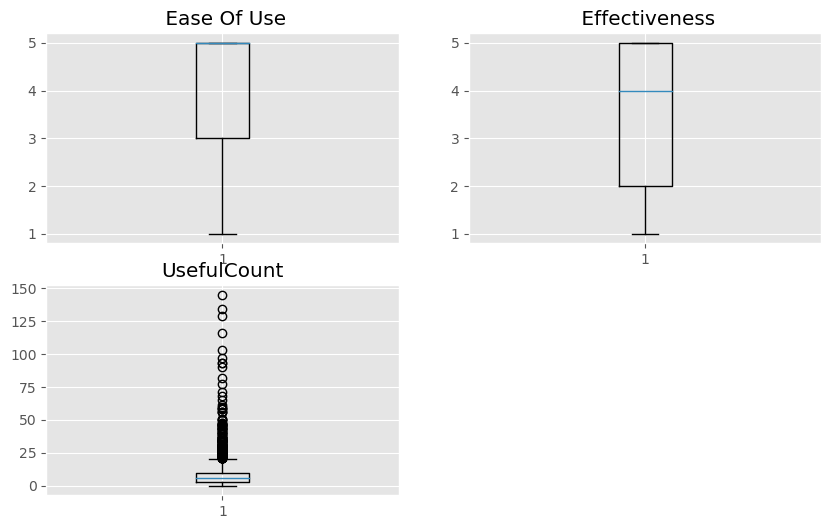

In [73]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data2["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data2["UsefulCount"])
plt.title("UsefulCount")


plt.show()

# Insight

Outliers are present in UsefulCount column.

In [74]:
Z= data2[['EaseofUse','Effectiveness','UsefulCount']]

Distribution Plot

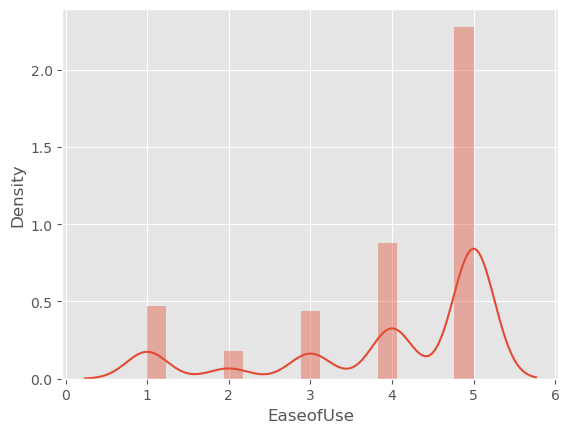

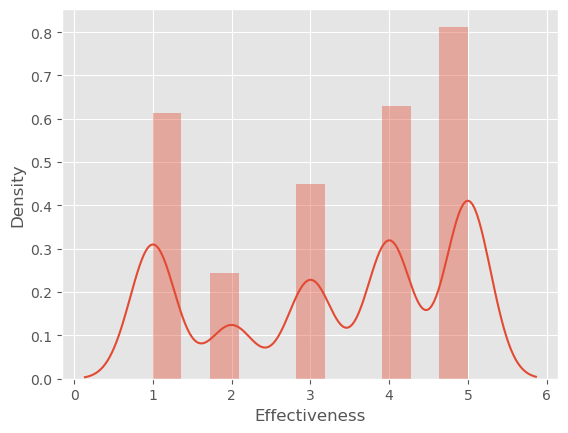

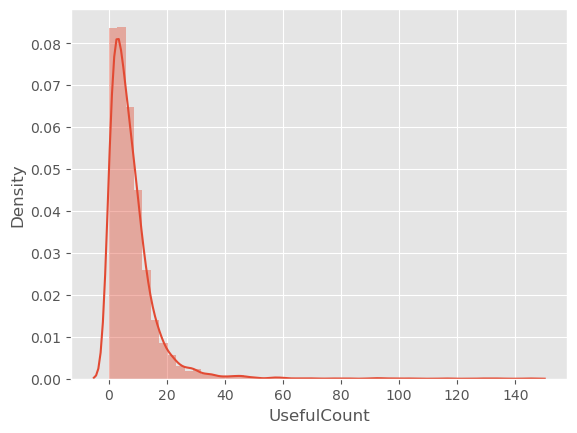

In [75]:
for i in Z:
  sns.distplot(Z[i])
  plt.show()

# Removing outliers

In [76]:
from scipy import stats

In [77]:
IQR =stats.iqr(data2.UsefulCount,interpolation='midpoint')
IQR

7.0

In [78]:
Q1=data2.UsefulCount.quantile(0.25)
Q3=data2.UsefulCount.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-7.5, 20.5)

In [79]:
data2.loc[data2.UsefulCount>max_limit]

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,SideEffects,Sex,Sides,UsefulCount
314329,Kena,Hispanic,55-64,Major Depressive Disorder,7/15/2014,cymbalta,5.0,5.0,THIS HAS INCREASED SWEATING TO A HORRIBLE DEGR...,moderate side effects,Female,"Nausea , dry mouth , constipation , loss of ...",22.0
314403,Colin,White,35-44,Major Depressive Disorder,4/10/2019,cymbalta,1.0,1.0,The WORST drug ever. Was on for over 10 years....,extreme severe side effects,others,"Nausea , dry mouth , constipation , loss of ...",27.0
314416,Leonida,White,45-54,Major Depressive Disorder,4/27/2018,cymbalta,1.0,1.0,Taken for depression and neuropathy. One pill ...,extreme severe side effects,Male,"Nausea , dry mouth , constipation , loss of ...",30.0
314424,Hilaria,Black,25-34,Major Depressive Disorder,6/12/2017,cymbalta,5.0,5.0,"very effective, almost saved my life. I now do...",no side effects,others,"Nausea , dry mouth , constipation , loss of ...",30.0
314465,Brock,White,19-24,Major Depressive Disorder,8/31/2018,cymbalta,5.0,5.0,I have been diagnosed with major depressive di...,moderate side effects,Female,"Nausea , dry mouth , constipation , loss of ...",28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319049,Angelic,White,65-74,Major Depressive Disorder,8/1/2008,cymbalta,5.0,5.0,This is the wonder drug for clinical depressio...,no side effects,Female,"Nausea , dry mouth , constipation , loss of ...",23.0
319061,Mckinley,White,35-44,Major Depressive Disorder,7/25/2008,cymbalta,5.0,5.0,"Over the last fifteen years, I have tried many...",no side effects,Female,"Nausea , dry mouth , constipation , loss of ...",44.0
319069,Leisha,Asian,45-54,Major Depressive Disorder,7/22/2008,cymbalta,5.0,3.0,this drug was the best...at first but after ta...,moderate side effects,Female,"Nausea , dry mouth , constipation , loss of ...",25.0
319071,Zachery,Asian,65-74,Other,7/22/2008,cymbalta,1.0,2.0,This is my second post. I just wanted to let e...,extreme severe side effects,Female,"Nausea , dry mouth , constipation , loss of ...",27.0


In [80]:
data2.loc[data2['UsefulCount']>max_limit,'UsefulCount']=np.median(data2.UsefulCount)

In [81]:
data2.loc[data2.UsefulCount>max_limit]

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,SideEffects,Sex,Sides,UsefulCount


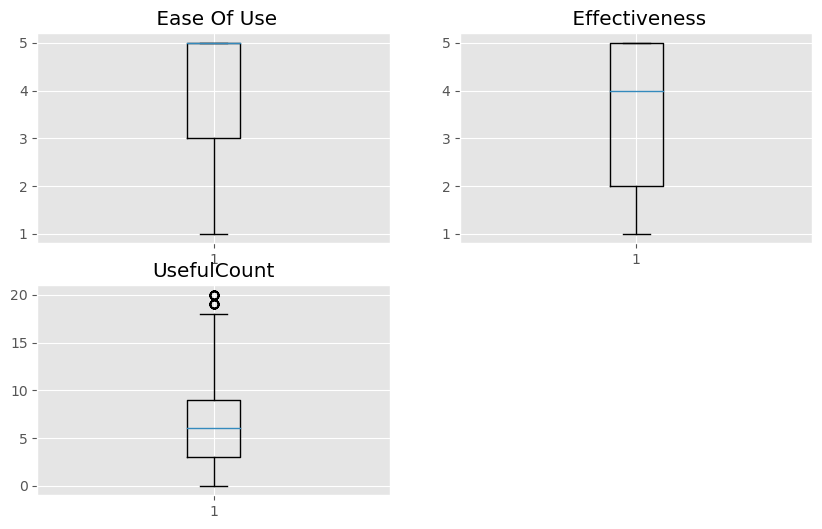

In [82]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data2["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data2["UsefulCount"])
plt.title("UsefulCount")


plt.show()

# 6. Feature Reduction

Droping the Unnecessary columns

In [84]:
data2=data2.drop(columns = ['Name','Drug','Date','Sides','Reviews'],axis=1)

data2=data2.reset_index(drop=True)



In [85]:
data2.head()

,Race,Age,Condition,EaseofUse,Effectiveness,SideEffects,Sex,UsefulCount
0,Hispanic,3-6,Major Depressive Disorder,5.0,5.0,no side effects,others,12.0
1,Hispanic,45-54,Repeated Episodes of Anxiety,3.0,1.0,extreme severe side effects,Male,0.0
2,Black,45-54,Anxiousness associated with Depression,5.0,5.0,no side effects,others,0.0
3,Asian,35-44,Anxiousness associated with Depression,3.0,3.0,severe side effects,Female,0.0
4,Black,55-64,Chronic Muscle or Bone Pain,2.0,2.0,severe side effects,others,1.0


In [86]:
data_cpy.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,SideEffects,Sex,Sides,UsefulCount
314212,Soo,Hispanic,3-6,Major Depressive Disorder,2/29/2020,cymbalta,5.0,5.0,No Script or health Insurance needed to place ...,no side effects,others,"Nausea , dry mouth , constipation , loss of ...",12.0
314216,Cris,Hispanic,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,3.0,1.0,I was prescribed Cymbalta for anxiety and star...,extreme severe side effects,Male,"Nausea , dry mouth , constipation , loss of ...",0.0
314223,Carol,Black,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,5.0,5.0,Switched from Effexor to this medicine after 1...,no side effects,others,"Nausea , dry mouth , constipation , loss of ...",0.0
314235,Keenan,Asian,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,3.0,3.0,Bipolar I with a neck fusion. Pdoc prescribed ...,severe side effects,Female,"Nausea , dry mouth , constipation , loss of ...",0.0
314246,Harry,Black,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,2.0,2.0,"I have depression, anxiety, Fibro, severe musc...",severe side effects,others,"Nausea , dry mouth , constipation , loss of ...",1.0


In [87]:
data_cpy=data_cpy.drop(columns = ['Name','Drug','Date','Sides','Reviews'],axis=1)
data_cpy=data_cpy.reset_index(drop=True)


# 7. Label Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects']:   
    data2[col]=label.fit_transform((data2[col]).astype(str))
    data_cpy[col]=label.fit_transform(data_cpy[col])

In [89]:
data2.head()

,Race,Age,Condition,EaseofUse,Effectiveness,SideEffects,Sex,UsefulCount
0,2,4,4,5.0,5.0,3,2,12.0
1,2,6,7,3.0,1.0,0,1,0.0
2,1,6,0,5.0,5.0,3,2,0.0
3,0,5,0,3.0,3.0,4,0,0.0
4,1,7,1,2.0,2.0,4,2,1.0


# Splitting the data

In [90]:
#target
y = data2['SideEffects']

In [91]:
x = data2.drop(['SideEffects'],axis=1)
x.shape

(4146, 7)

In [92]:
ycp=data_cpy['SideEffects']
xcp=data_cpy.drop(['SideEffects'],axis=1)


# Scalling

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
data_scaled

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,UsefulCount
0,0.666667,0.4,0.571429,1.00,1.00,1.0,0.60
1,0.666667,0.6,1.000000,0.50,0.00,0.5,0.00
2,0.333333,0.6,0.000000,1.00,1.00,1.0,0.00
3,0.000000,0.5,0.000000,0.50,0.50,0.0,0.00
4,0.333333,0.7,0.142857,0.25,0.25,1.0,0.05
...,...,...,...,...,...,...,...
4141,1.000000,0.5,0.571429,1.00,0.00,0.5,0.65
4142,0.333333,0.5,0.571429,1.00,1.00,0.0,0.30
4143,1.000000,0.5,0.571429,1.00,0.50,0.0,0.45
4144,0.333333,0.7,0.571429,0.75,0.75,0.0,0.30


# Normalization

In [94]:
from sklearn import preprocessing
df = preprocessing.normalize(data_scaled)
norm_df = pd.DataFrame(df, columns=data_scaled.columns)
norm_df

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,UsefulCount
0,0.321833,0.193100,0.275857,0.482750,0.482750,0.482750,0.289650
1,0.439163,0.395247,0.658744,0.329372,0.000000,0.329372,0.000000
2,0.178914,0.322045,0.000000,0.536742,0.536742,0.536742,0.000000
3,0.000000,0.577350,0.000000,0.577350,0.577350,0.000000,0.000000
4,0.252047,0.529299,0.108020,0.189035,0.189035,0.756141,0.037807
...,...,...,...,...,...,...,...
4141,0.554783,0.277391,0.317019,0.554783,0.000000,0.277391,0.360609
4142,0.200005,0.300007,0.342866,0.600015,0.600015,0.000000,0.180004
4143,0.574577,0.287288,0.328330,0.574577,0.287288,0.000000,0.258560
4144,0.227721,0.478215,0.390380,0.512373,0.512373,0.000000,0.204949


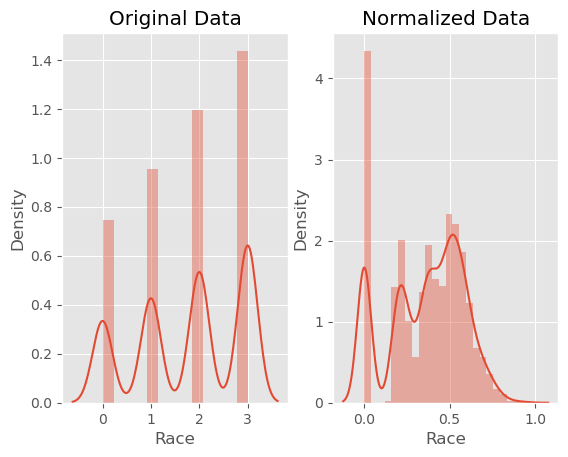

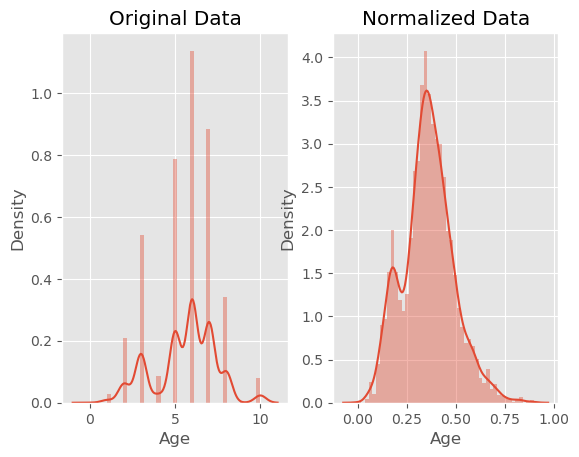

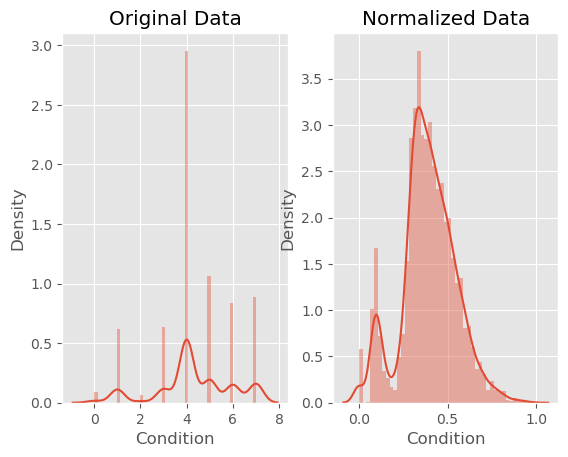

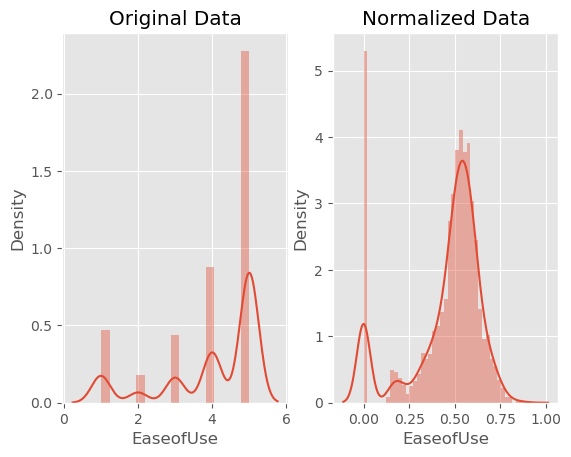

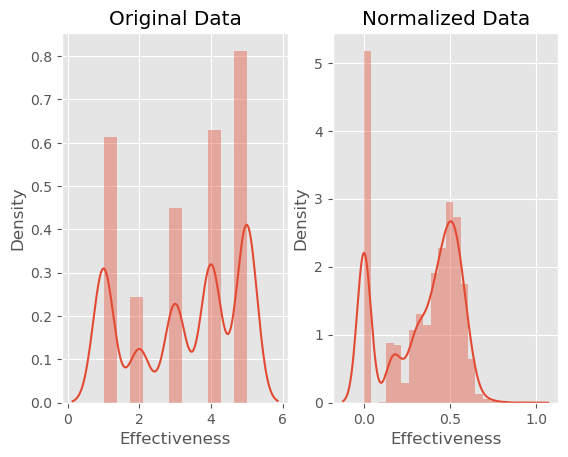

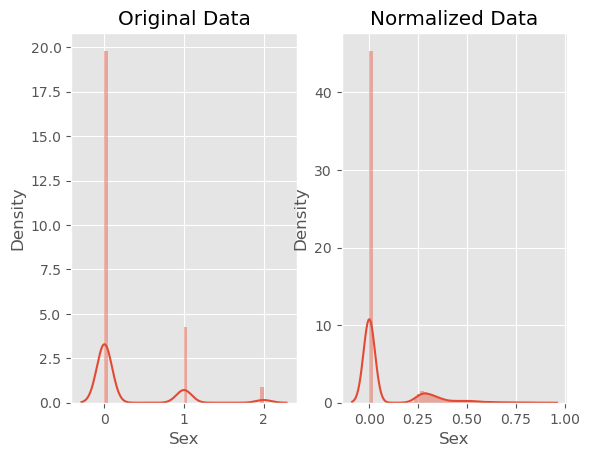

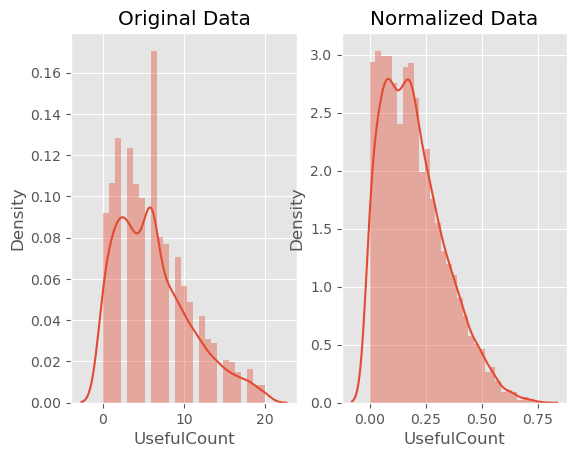

In [95]:
for i in x:
    fig,ax=plt.subplots(1,2)
    sns.distplot(x[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(norm_df[i],ax=ax[1])
    ax[1].set_title("Normalized Data")

In [96]:
x=norm_df

# Splitting the dataset into train and test sets

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.2)
xcp_train,xcp_test,ycp_train,ycp_test=train_test_split(xcp,ycp,random_state=42,test_size=0.2)
#assigninng values
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report

# Modelling

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

In [99]:
print("accuracy is",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))


accuracy is 0.5855421686746988
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       282
           1       0.35      0.13      0.19       142
           2       0.39      0.10      0.16       122
           3       0.51      0.96      0.66       211
           4       0.00      0.00      0.00        73

    accuracy                           0.59       830
   macro avg       0.39      0.42      0.36       830
weighted avg       0.49      0.59      0.50       830



# KNN

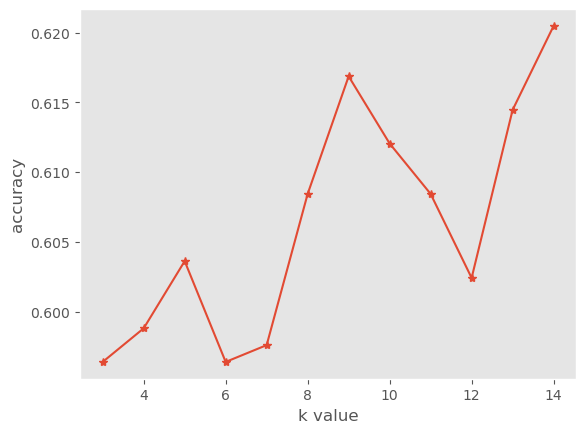

In [100]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(x_train, y_train)
        y_pred_knn = model2.predict(x_test)
        acc=accuracy_score(y_test,y_pred_knn)
        metric_k.append(acc)
        
plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [129]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=14, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("accuracy is",accuracy_score(y_test,y_pred))
print("confusion matrix is",confusion_matrix(y_test,y_pred))


accuracy is 0.6204819277108434
confusion matrix is [[233  10  19  17   3]
 [  6  64   4  68   0]
 [ 16  52  29  24   1]
 [  0  24   1 186   0]
 [ 18  18  13  21   3]]


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       282
           1       0.37      0.45      0.41       142
           2       0.43      0.30      0.35       122
           3       0.60      0.78      0.68       211
           4       0.22      0.05      0.09        73

    accuracy                           0.60       830
   macro avg       0.49      0.48      0.47       830
weighted avg       0.57      0.60      0.57       830



#  Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_decision=decision.predict(x_test)

print("accuracy is",accuracy_score(y_test,y_decision))
print("confusion matrix is",confusion_matrix(y_test,y_decision))


accuracy is 0.5481927710843374
confusion matrix is [[216  11  17  14  24]
 [ 11  58  29  37   7]
 [ 23  32  35  19  13]
 [ 12  51  14 132   2]
 [ 16  11  19  13  14]]


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       282
           1       0.37      0.45      0.41       142
           2       0.43      0.30      0.35       122
           3       0.60      0.78      0.68       211
           4       0.22      0.05      0.09        73

    accuracy                           0.60       830
   macro avg       0.49      0.48      0.47       830
weighted avg       0.57      0.60      0.57       830



# Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)
y_grad=grad.predict(x_test)

print("accuracy is",accuracy_score(y_test,y_grad))
print("confusion matrix is",confusion_matrix(y_test,y_grad))


accuracy is 0.636144578313253
confusion matrix is [[226  17  18  12   9]
 [  6  70  18  43   5]
 [ 16  31  56  17   2]
 [  0  28   9 172   2]
 [ 23  12  23  11   4]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       282
           1       0.37      0.45      0.41       142
           2       0.43      0.30      0.35       122
           3       0.60      0.78      0.68       211
           4       0.22      0.05      0.09        73

    accuracy                           0.60       830
   macro avg       0.49      0.48      0.47       830
weighted avg       0.57      0.60      0.57       830



# Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train,y_train)
y_rand=rand.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_rand))
print("confusion matrix is",confusion_matrix(y_test,y_rand))

accuracy is 0.608433734939759
confusion matrix is [[227  16  14  14  11]
 [  6  62  23  49   2]
 [ 18  36  41  14  13]
 [  3  33   7 165   3]
 [ 23  10  18  12  10]]


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       282
           1       0.37      0.45      0.41       142
           2       0.43      0.30      0.35       122
           3       0.60      0.78      0.68       211
           4       0.22      0.05      0.09        73

    accuracy                           0.60       830
   macro avg       0.49      0.48      0.47       830
weighted avg       0.57      0.60      0.57       830



# Linear SVM

In [109]:
from sklearn.svm import LinearSVC
support=LinearSVC()
support.fit(x_train,y_train)
y_support=support.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_rand))
print("confusion matrix is",confusion_matrix(y_test,y_rand))

accuracy is 0.608433734939759
confusion matrix is [[227  16  14  14  11]
 [  6  62  23  49   2]
 [ 18  36  41  14  13]
 [  3  33   7 165   3]
 [ 23  10  18  12  10]]


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       282
           1       0.37      0.45      0.41       142
           2       0.43      0.30      0.35       122
           3       0.60      0.78      0.68       211
           4       0.22      0.05      0.09        73

    accuracy                           0.60       830
   macro avg       0.49      0.48      0.47       830
weighted avg       0.57      0.60      0.57       830



# Fine tuning of parametres

In [111]:
randfine=RandomForestClassifier(max_depth=100,n_estimators=100)
randfine.fit(x_train,y_train)
y_randfine=randfine.predict(x_test)
print("accuracy is",accuracy_score(y_test,y_randfine))
print("confusion matrix is",confusion_matrix(y_test,y_randfine))

accuracy is 0.6048192771084338
confusion matrix is [[224  16  14  13  15]
 [  6  64  21  47   4]
 [ 18  36  39  16  13]
 [  3  33   6 166   3]
 [ 22  10  20  12   9]]


In [112]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages to be run
    'learning_rate': [0.1, 0.05, 0.01],   # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],               # Maximum depth of the individual estimators
    # Add more hyperparameters to fine-tune if needed
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters found by GridSearch
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_gb_classifier = grid_search.best_estimator_
y_pred = best_gb_classifier.predict(x_test)

# Calculate and print the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Test Accuracy: 0.6397590361445783


# Since we are getting Accuracy of Gradient Boosting as 63.975%,let us now check the accuracy by without removing the outliers¶

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(xcp_train,ycp_train)
ycp_pred = logit_model.predict(xcp_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

In [135]:
print("accuracy is",accuracy_score(ycp_test,ycp_pred))
print(classification_report(ycp_test, ycp_pred))



accuracy is 0.6469879518072289
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       282
           1       0.47      0.61      0.53       142
           2       0.43      0.24      0.31       122
           3       0.73      0.84      0.78       211
           4       0.00      0.00      0.00        73

    accuracy                           0.65       830
   macro avg       0.47      0.51      0.48       830
weighted avg       0.58      0.65      0.60       830



# KNN

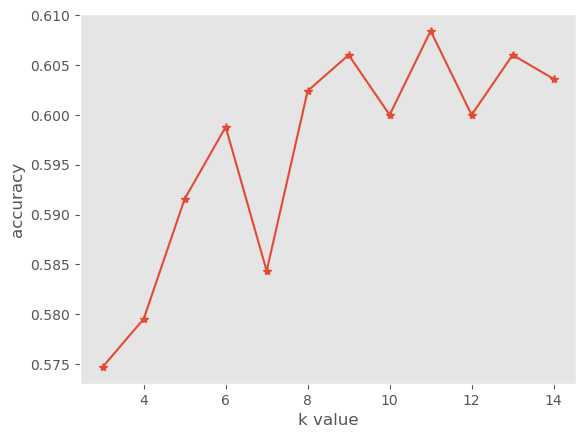

In [136]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(xcp_train, ycp_train)
        ycp_pred_knn = model2.predict(xcp_test)
        acc=accuracy_score(ycp_test,ycp_pred_knn)
        metric_k.append(acc)
        
plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [137]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=11, metric='minkowski')
classifier.fit(xcp_train,ycp_train)
y_pred=classifier.predict(xcp_test)
acc=accuracy_score(ycp_test,ycp_pred)
print("accuracy is",accuracy_score(ycp_test,ycp_pred))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_pred))



accuracy is 0.6469879518072289
confusion matrix is [[244  13  13  12   0]
 [ 10  87  11  34   0]
 [ 42  41  29  10   0]
 [  0  33   1 177   0]
 [ 38  11  13  11   0]]


In [117]:
print(classification_report(ycp_test, ycp_pred))


              precision    recall  f1-score   support

           0       0.73      0.87      0.79       282
           1       0.47      0.61      0.53       142
           2       0.43      0.24      0.31       122
           3       0.73      0.84      0.78       211
           4       0.00      0.00      0.00        73

    accuracy                           0.65       830
   macro avg       0.47      0.51      0.48       830
weighted avg       0.58      0.65      0.60       830



# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(xcp_train,ycp_train)
ycp_decision=decision.predict(xcp_test)

print("accuracy is",accuracy_score(ycp_test,ycp_decision))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_decision))


accuracy is 0.572289156626506
confusion matrix is [[218  17  19   9  19]
 [ 13  59  29  33   8]
 [ 21  33  37  16  15]
 [ 11  36  15 144   5]
 [ 19   8  17  12  17]]


In [119]:
print(classification_report(ycp_test, ycp_pred))


              precision    recall  f1-score   support

           0       0.73      0.87      0.79       282
           1       0.47      0.61      0.53       142
           2       0.43      0.24      0.31       122
           3       0.73      0.84      0.78       211
           4       0.00      0.00      0.00        73

    accuracy                           0.65       830
   macro avg       0.47      0.51      0.48       830
weighted avg       0.58      0.65      0.60       830



# Random Forest

In [139]:
randcp=RandomForestClassifier(max_depth=100,n_estimators=100)
randcp.fit(xcp_train,ycp_train)
ycp_randcp=randcp.predict(xcp_test)
print("accuracy is",accuracy_score(ycp_test,ycp_randcp))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_randcp))

accuracy is 0.6216867469879518
confusion matrix is [[229  19  11  11  12]
 [  7  67  23  40   5]
 [ 20  32  44  15  11]
 [  3  34   6 165   3]
 [ 22   9  23   8  11]]


In [121]:
print(classification_report(ycp_test, ycp_pred))


              precision    recall  f1-score   support

           0       0.73      0.87      0.79       282
           1       0.47      0.61      0.53       142
           2       0.43      0.24      0.31       122
           3       0.73      0.84      0.78       211
           4       0.00      0.00      0.00        73

    accuracy                           0.65       830
   macro avg       0.47      0.51      0.48       830
weighted avg       0.58      0.65      0.60       830



# Linear SVM

In [140]:
from sklearn.svm import LinearSVC
support=LinearSVC()
support.fit(xcp_train,ycp_train)
ycp_rand=support.predict(xcp_test)
print("accuracy is",accuracy_score(ycp_test,ycp_rand))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_rand))

accuracy is 0.5807228915662651
confusion matrix is [[262   3   1  16   0]
 [ 25  18   3  96   0]
 [ 76   9   0  37   0]
 [  4   5   0 202   0]
 [ 53   4   1  15   0]]


In [123]:
print(classification_report(ycp_test, ycp_pred))


              precision    recall  f1-score   support

           0       0.73      0.87      0.79       282
           1       0.47      0.61      0.53       142
           2       0.43      0.24      0.31       122
           3       0.73      0.84      0.78       211
           4       0.00      0.00      0.00        73

    accuracy                           0.65       830
   macro avg       0.47      0.51      0.48       830
weighted avg       0.58      0.65      0.60       830



# Gradient Boosting

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(xcp_train,ycp_train)
ycp_grad=grad.predict(xcp_test)

print("accuracy is",accuracy_score(ycp_test,ycp_grad))
print("confusion matrix is",confusion_matrix(ycp_test,ycp_grad))


accuracy is 0.6674698795180722
confusion matrix is [[230  13  19  12   8]
 [  8  87  11  35   1]
 [ 19  37  52   9   5]
 [  0  34   1 176   0]
 [ 16  12  25  11   9]]


In [125]:
print(classification_report(ycp_test, ycp_pred))


              precision    recall  f1-score   support

           0       0.73      0.87      0.79       282
           1       0.47      0.61      0.53       142
           2       0.43      0.24      0.31       122
           3       0.73      0.84      0.78       211
           4       0.00      0.00      0.00        73

    accuracy                           0.65       830
   macro avg       0.47      0.51      0.48       830
weighted avg       0.58      0.65      0.60       830



In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages to be run
    'learning_rate': [0.1, 0.05, 0.01],   # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],               # Maximum depth of the individual estimators
    # Add more hyperparameters to fine-tune if needed
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(xcp_train, ycp_train)

# Get the best hyperparameters found by GridSearch
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_gb_classifier = grid_search.best_estimator_
ycp_pred = best_gb_classifier.predict(xcp_test)

# Calculate and print the accuracy of the best model
accuracy = accuracy_score(ycp_test, ycp_pred)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.6771084337349398


In [128]:
print(classification_report(ycp_test, ycp_pred))


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       282
           1       0.48      0.65      0.56       142
           2       0.49      0.48      0.49       122
           3       0.74      0.83      0.78       211
           4       0.00      0.00      0.00        73

    accuracy                           0.68       830
   macro avg       0.51      0.56      0.53       830
weighted avg       0.63      0.68      0.65       830



# Inference

Accuracies of classification models with removing outlers:

Logistic Regression - 58.55

KNN Model - 62.04

Decision Tree Classifier - 54.81%

Support Vector Machine:

Linear SVM - 60.84%

Random Forest - 60.84%

Gradient Boosting - 63.61%

Fine-Tunnig Gradient Boosting - 63.97%

Accuracies of classification models without removing outlers:      

Logistic Regression - 64.69%

KNN Model - 64.69%

Decision Tree Classifier - 57.22%

Support Vector Machine:

Linear SVM - 58.07%

Random Forest - 62.16%

Gradient Boosting - 66.74%

Fine-Tunnig Gradient Boosting - 67.71%

# Conclusion

From different modelling, the best classification model was obtained by Gradient Booster. On performance evaluation, maximum accuracy of 67.71% has been achieved.


By race, Whites topped in the usage of this drug with a higher female ratio. Domination of female users were consistent across age groups.
Also, people in the age groups 35 to 44, 45 to 54 and 55 to 64 accounted for maximum usage of cymbalta. Most users found cymbalta as highly effective, especially females. Side effects of the drug proved race neutral. Genderwise, side effects proved extreme in females.

# Recommendation


Based on the derived EDAs, the following is recommended with regard to the use of cymbalta:

Females in general better to use the drug under a physician’s guidance because they have the high chances of extremely severe side effects (maximum usage of drug).
a study about the main reasons that compile this females for Cymbalta drug intake will be valuable.